In [7]:
import os
import json
from llmtuner import run_exp, ChatModel
import torch

torch.cuda.empty_cache()
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
os.environ['HF_HUB_ENABLE_HF_TRANSFER'] = '1'
os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'

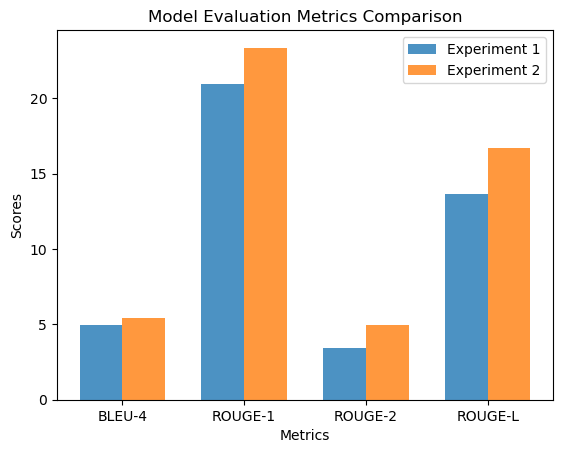

In [8]:
# Plot the prediction results to compare the model performance
import json
import matplotlib.pyplot as plt
%matplotlib inline

def read_results(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

        def get_score(metric_key):
            metric_value = data.get(metric_key, 0)
            return metric_value.get('fmeasure', 0) if isinstance(metric_value, dict) else metric_value

        return {
            'BLEU-4': get_score('predict_bleu-4'),
            'ROUGE-1': get_score('predict_rouge-1'),
            'ROUGE-2': get_score('predict_rouge-2'),
            'ROUGE-L': get_score('predict_rouge-l'),
        }

results_paths = [
    '/home/zhangmin/toby/IBA_Project_24spr/saves/exp/glm_6b/predict_results.json',
    '/home/zhangmin/toby/IBA_Project_24spr/saves/exp/insurance_glm_6b/predict_results.json'
]

exp_results = [read_results(path) for path in results_paths]

metrics = ['BLEU-4', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
x = range(len(metrics))

fig, ax = plt.subplots()
x_offset = 0
for i, result in enumerate(exp_results):
    scores = [result[metric] for metric in metrics]
    ax.bar([xi + x_offset for xi in x], scores, width=0.35, align='center', alpha=0.8, label=f'Experiment {i+1}')
    x_offset += 0.35

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics Comparison')
ax.set_xticks([i + 0.175 for i in range(len(metrics))])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
plt.close()